<a href="https://colab.research.google.com/github/kryogenica/Image-compression-using-Matrix-Product-States/blob/master/DataMatcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Getting access and permission to my google drive where I have uploaded the data.**

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
import matplotlib.pyplot as plt
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 


**Setting links for each particular data set.**

In [0]:
link1 = 'https://drive.google.com/open?id=1DvHLe81pRy0lUoRKLeGrdNiboIDbp1Cq'#SeeThru's data
link2 = 'https://drive.google.com/open?id=0B9Qn8gFNUcLcNy1MSWdTcWhvWVhSRlFtdWVsU3RRc21wRjZN'#Rosen's data

In [0]:
fluff1, id1 = link1.split('=')
fluff2, id2 = link2.split('=')
del fluff1, fluff2

In [0]:
import pandas as pd

#Loading SeeThru's Data
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('SeeThrusData.csv')  
df3_SeeThru = pd.read_csv('SeeThrusData.csv')

#Loading Rosen's Data
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('RosensData.csv')  
df3_Rosen = pd.read_csv('RosensData.csv')

**Cleaning data by removing rows that match one or more of the following criterias:**

1.   **Contains "Chemist Confessions" in the "retail" section**
2.   **Contains the phrase "dollarcream" in the "URL" section**
3.   **Contains the phrase "localhost" in the "URL" section**

In [0]:
df3_SeeThru = df3_SeeThru.loc[~df3_SeeThru.isin(['Chemist Confessions']).any(1)]
df3_SeeThru = df3_SeeThru[~df3_SeeThru['URL'].str.contains('dollarcream')]
df3_SeeThru = df3_SeeThru[~df3_SeeThru['URL'].str.contains('localhost')]

In [0]:
df3_SeeThru = df3_SeeThru.sort_values(by=['userID', 'timeStamp'])

In [0]:
df3_SeeThru = df3_SeeThru.reset_index(drop=True)

In [0]:
print (df3_SeeThru['userID'].head())

0    1000876
1    1000876
2    1002121
3    1002121
4    1002121
Name: userID, dtype: int64


In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [0]:
df3_SeeThru.to_csv('SeeThru_processed.csv')
!mv SeeThru_processed.csv drive/My\ Drive/

In [0]:
users_action_count = df3_SeeThru.groupby(['userID']).size().reset_index(name='count')
print (users_action_count.head())

    userID  count
0  1000876      2
1  1002121      3
2  1002925      2
3  1003928      1
4  1003958      1


**Histogram of the number of actions done by each unique user.**

Text(0, 0.5, 'Number of users')

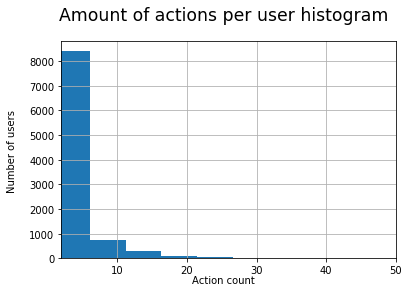

In [0]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
histogram = users_action_count['count'].hist(bins=60,ax=axes).set_xlim((2,50))
# set title and axis labels
plt.suptitle('Amount of actions per user histogram', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Action count', ha='center')
fig.text(0, 0.5, 'Number of users', va='center', rotation='vertical')


In [0]:
print ("The number of unique users was: "+str(users_action_count.shape[0]))
more_than_one = users_action_count.loc[users_action_count['count'] != 1]
print ("The number of users than made more than one action: "+str(more_than_one.shape[0]))

The number of unique users was: 9698
The number of users than made more than one action: 5300


In [0]:
users_each_action_count = df3_SeeThru.groupby(['userID','action']).size().reset_index(name='count')
print (users_each_action_count[8:20])

     userID                                             action  count
8   1009636                                        pageVisited      6
9   1010915                                 feedbackProd_Great      1
10  1010915  ingreOpened_Castor Oil (Ricinus&nbsp;Communis&...      1
11  1010915                             ingreOpened_Glycerin,       1
12  1010915  ingreOpened_Grapefruit&nbsp;(Citrus Grandis)&n...      1
13  1010915  ingreOpened_Lemon (Citrus Medica Limonum) Powd...      1
14  1010915    ingreOpened_Radish Root (Leuconostoc) Ferment,       1
15  1010915  ingreOpened_Rose Water (Rosa Centrifolia Flowe...      1
16  1010915            ingreOpened_Vitamin C (Ascorbic Acid),       1
17  1010915                                        pageVisited      4
18  1010915                                      widgetClosing      3
19  1010915                                       widgetOpened      3


In [0]:
user_opened_widget = users_each_action_count.loc[users_each_action_count['action'] == 'widgetOpened', 'userID'].reset_index(drop=True).tolist()

In [0]:
print ("Number of users that opened widget: "+str(len(user_opened_widget)))

Number of users that opened widget: 654


In [0]:
users_each_action_count[users_each_action_count.userID.isin(user_opened_widget).astype(str),'action']

TypeError: ignored